# Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import requests
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt

# Web-scrape Tohoku's fruiting index

In [2]:
# URL to scrape
url = "https://www.rinya.maff.go.jp/tohoku/sidou/buna.html" 

# Send a GET request to the webpage
response = requests.get(url) 

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the response with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all tables on the page
    tables = soup.find_all('table')

    # Loop through all tables to find the one with more than 30 rows
    for table in tables:
        rows = table.find_all('tr')
        # Check if the table has more than 30 rows
        if len(rows) > 30:
            # Extract headers
            #headers = [th.text.strip() for th in rows[0].find_all('th')]
            headers = ['JP_Year', 
                       'Aomori Flowering', 'Aomori Fruiting', #青森県
                       'Iwate Flowering', 'Iwate Fruiting', #岩手県
                       'Miyagi Flowering', 'Miyagi Fruiting', #宮城県
                       'Akita Flowering', 'Akita Fruiting', #秋田県
                       'Yamagata Flowering', 'Yamagata Fruiting' #山形県
                      ]

            # Extract data rows
            data_rows = []
            for tr in rows[2:]:  # Skip the header row
                cols = [td.text.strip() for td in tr.find_all('td')]
                data_rows.append(cols)

            # Create a DataFrame
            df = pd.DataFrame(data_rows, columns=headers)

            # Add the "Year" column
            year_range = list(range(1989, 2026))  # Years from 1989 to 2025
            df.insert(0, "Year", year_range)  # Insert at the first position
            
            print(df)
            break
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)

    Year JP_Year Aomori Flowering Aomori Fruiting Iwate Flowering  \
0   1989    平成元年                              3.4                   
1   1990    平成2年              3.4             2.2             4.3   
2   1991    平成3年              0.8             0.6             0.7   
3   1992    平成4年              4.5             4.1             2.3   
4   1993    平成5年              2.1             1.0             3.3   
5   1994    平成6年              1.7             1.3             0.9   
6   1995    平成7年              4.0             4.2             3.6   
7   1996    平成8年              0.7             0.6             0.9   
8   1997    平成9年              2.2             1.8             2.2   
9   1998   平成10年              1.7             1.4             1.4   
10  1999   平成11年              1.1             0.7             1.1   
11  2000   平成12年              4.6             4.7             4.6   
12  2001   平成13年              0.3             0.2             0.9   
13  2002   平成14年              1.2 

# Data cleaning

In [3]:
 # drop column
df2 = df.drop(columns=['JP_Year'])

# Columns to convert
columns_to_convert = [
    'Aomori Flowering', 'Aomori Fruiting',
    'Iwate Flowering', 'Iwate Fruiting', 
    'Miyagi Flowering', 'Miyagi Fruiting', 
    'Akita Flowering', 'Akita Fruiting', 
    'Yamagata Flowering', 'Yamagata Fruiting'
]

# Convert columns to float and handle missing values
for column in columns_to_convert:
    # Replace dashes with NaN
    df2[column].replace('-', np.nan, inplace=True)
    
    # Convert to float, rounding to 1 decimal place
    df2[column] = pd.to_numeric(df2[column], errors='coerce').round(1)

# Display the updated DataFrame
print(df2)

    Year  Aomori Flowering  Aomori Fruiting  Iwate Flowering  Iwate Fruiting  \
0   1989               NaN              3.4              NaN             1.9   
1   1990               3.4              2.2              4.3             3.3   
2   1991               0.8              0.6              0.7             0.4   
3   1992               4.5              4.1              2.3             2.2   
4   1993               2.1              1.0              3.3             1.9   
5   1994               1.7              1.3              0.9             0.6   
6   1995               4.0              4.2              3.6             3.6   
7   1996               0.7              0.6              0.9             1.2   
8   1997               2.2              1.8              2.2             1.5   
9   1998               1.7              1.4              1.4             1.0   
10  1999               1.1              0.7              1.1             0.8   
11  2000               4.6              

/private/var/mobile/Containers/Data/Application/2F422EA8-294D-4B55-B735-EA2086CE50CA/tmp/ipykernel_1400/3488482566.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[column].replace('-', np.nan, inplace=True)


In [5]:
# Create a subset of Tohoku's data for comparison with Chubu' data

df3 = df2[19:34]

string = 'Flowering'

df3 = df3.drop(list(df3.filter(regex=string)),axis=1)
df3 = df3.rename(columns={
    'Aomori Fruiting':'Aomori',
    'Iwate Fruiting': 'Iwate',
    'Miyagi Fruiting': 'Miyagi',
    'Akita Fruiting': 'Akita',
    'Yamagata Fruiting': 'Yamagata'
                         })
df3

Year  Aomori  Iwate  Miyagi  Akita  Yamagata
19  2008     1.6    1.5     1.7    1.0       1.5
20  2009     1.4    1.1     2.0    1.2       1.3
21  2010     0.7    0.7     0.5    0.3       0.2
22  2011     1.3    1.3     1.5    1.1       2.0
23  2012     0.4    0.0     2.2    0.7       0.2
24  2013     3.4    3.8     5.0    2.9       2.3
25  2014     0.8    0.2     0.7    0.4       0.2
26  2015     2.0    4.2     3.4    1.8       3.5
27  2016     0.5    0.0     0.0    0.1       0.1
28  2017     1.2    1.2     0.7    0.7       0.4
29  2018     1.2    1.8     2.5    1.7       3.9
30  2019     0.6    0.1     0.3    0.2       0.0
31  2020     2.3    1.3     0.7    2.0       0.3
32  2021     1.0    0.7     1.7    0.2       1.5
33  2022     2.9    2.7     1.3    2.8       3.1

In [6]:
# From wide to long format

df3 = pd.melt(
    df3,
    id_vars='Year',
    value_vars=['Aomori','Iwate','Miyagi','Akita','Yamagata'],
    var_name='location_eng',
    value_name='fruiting_index'
)
df3

Year location_eng  fruiting_index
0   2008       Aomori             1.6
1   2009       Aomori             1.4
2   2010       Aomori             0.7
3   2011       Aomori             1.3
4   2012       Aomori             0.4
..   ...          ...             ...
70  2018     Yamagata             3.9
71  2019     Yamagata             0.0
72  2020     Yamagata             0.3
73  2021     Yamagata             1.5
74  2022     Yamagata             3.1

[75 rows x 3 columns]

In [7]:
# Import bear_data
bear_data = pd.read_excel('bear_data.xlsx')
bear_data

location_chn location_eng era_x  cases  injury_person  death_person  year  \
0            北海道     Hokkaido   H20      3              3             3  2008   
1             青森       Aomori   H20      2              6             0  2008   
2             岩手        Iwate   H20      9             10             0  2008   
3             宮城       Miyagi   H20      1              1             0  2008   
4             秋田        Akita   H20      4              4             0  2008   
..           ...          ...   ...    ...            ...           ...   ...   
697           山口    Yamaguchi   R07      0              0             0  2025   
698           徳島    Tokushima   R07      0              0             0  2025   
699           香川       Kagawa   R07      0              0             0  2025   
700           愛媛        Ehime   R07      0              0             0  2025   
701           高知        Kochi   R07      0              0             0  2025   

    era_y  show_up_case  
0     NaN           NaN  
1     NaN           NaN  
2     NaN           NaN  
3     NaN           NaN  
4     NaN           NaN  
..    ...           ...  
697   R07         300.0  
698   R07           6.0  
699   R07           0.0  
700   R07           0.0  
701   R07           0.0  

[702 rows x 9 columns]

In [8]:
# Join Tohoku's data and Bear data
merged_df = pd.merge(
    df3,
    bear_data,
    left_on=['Year','location_eng'],
    right_on=['year','location_eng'],
    how='inner'
)

In [14]:
# import Chubu's data
chubu = pd.read_excel('Chubu_fruiting_index.xlsx')
chubu

region_eng region_chn location_eng location_chn japanese_year  year  \
0       Chubu         中部       Toyama           富山           H17  2005   
1       Chubu         中部       Toyama           富山           H18  2006   
2       Chubu         中部       Toyama           富山           H19  2007   
3       Chubu         中部       Toyama           富山           H20  2008   
4       Chubu         中部       Toyama           富山           H21  2009   
..        ...        ...          ...          ...           ...   ...   
67      Chubu         中部        Aichi           愛知           H30  2018   
68      Chubu         中部        Aichi           愛知            R1  2019   
69      Chubu         中部        Aichi           愛知            R2  2020   
70      Chubu         中部        Aichi           愛知            R3  2021   
71      Chubu         中部        Aichi           愛知            R4  2022   

    Fruiting_index  
0              5.0  
1              1.0  
2              1.8  
3              3.0  
4              2.7  
..             ...  
67             0.0  
68             1.0  
69             0.0  
70             0.0  
71             0.0  

[72 rows x 7 columns]

In [15]:
# copy
merged2 = merged_df

In [16]:
# add columns 'region_chn', 'region_eng'
merged2['region_chn'] = '東北'
merged2

Year location_eng  fruiting_index location_chn era_x  cases  \
0   2008       Aomori             1.6           青森   H20      2   
1   2009       Aomori             1.4           青森   H21      4   
2   2010       Aomori             0.7           青森   H22      4   
3   2011       Aomori             1.3           青森   H23      5   
4   2012       Aomori             0.4           青森   H24      2   
..   ...          ...             ...          ...   ...    ...   
70  2018     Yamagata             3.9           山形   H30      1   
71  2019     Yamagata             0.0           山形   R01      4   
72  2020     Yamagata             0.3           山形   R02      5   
73  2021     Yamagata             1.5           山形   R03      0   
74  2022     Yamagata             3.1           山形   R04      2   

    injury_person  death_person  year era_y  show_up_case region_chn  
0               6             0  2008   NaN           NaN         東北  
1               4             1  2009   NaN           NaN         東北  
2               4             0  2010   NaN           NaN         東北  
3               5             0  2011   NaN           NaN         東北  
4               2             0  2012   NaN           NaN         東北  
..            ...           ...   ...   ...           ...        ...  
70              1             0  2018   NaN           NaN         東北  
71              4             0  2019   NaN           NaN         東北  
72              5             0  2020   NaN           NaN         東北  
73              0             0  2021   R03         284.0         東北  
74              2             0  2022   R04         377.0         東北  

[75 rows x 12 columns]

In [17]:
merged2['region_eng'] = 'Tohoku'
merged2

Year location_eng  fruiting_index location_chn era_x  cases  \
0   2008       Aomori             1.6           青森   H20      2   
1   2009       Aomori             1.4           青森   H21      4   
2   2010       Aomori             0.7           青森   H22      4   
3   2011       Aomori             1.3           青森   H23      5   
4   2012       Aomori             0.4           青森   H24      2   
..   ...          ...             ...          ...   ...    ...   
70  2018     Yamagata             3.9           山形   H30      1   
71  2019     Yamagata             0.0           山形   R01      4   
72  2020     Yamagata             0.3           山形   R02      5   
73  2021     Yamagata             1.5           山形   R03      0   
74  2022     Yamagata             3.1           山形   R04      2   

    injury_person  death_person  year era_y  show_up_case region_chn  \
0               6             0  2008   NaN           NaN         東北   
1               4             1  2009   NaN           NaN         東北   
2               4             0  2010   NaN           NaN         東北   
3               5             0  2011   NaN           NaN         東北   
4               2             0  2012   NaN           NaN         東北   
..            ...           ...   ...   ...           ...        ...   
70              1             0  2018   NaN           NaN         東北   
71              4             0  2019   NaN           NaN         東北   
72              5             0  2020   NaN           NaN         東北   
73              0             0  2021   R03         284.0         東北   
74              2             0  2022   R04         377.0         東北   

   region_eng  
0      Tohoku  
1      Tohoku  
2      Tohoku  
3      Tohoku  
4      Tohoku  
..        ...  
70     Tohoku  
71     Tohoku  
72     Tohoku  
73     Tohoku  
74     Tohoku  

[75 rows x 13 columns]

In [18]:
# reorder columns
merged3 = merged2[['region_eng', 'region_chn', 'location_eng', 'location_chn', 'era_x', 'year','fruiting_index']]

In [19]:
# change column names
merged3 = merged3.rename(columns={'fruiting_index':'Fruiting_index'})
merged3

region_eng region_chn location_eng location_chn era_x  year  Fruiting_index
0      Tohoku         東北       Aomori           青森   H20  2008             1.6
1      Tohoku         東北       Aomori           青森   H21  2009             1.4
2      Tohoku         東北       Aomori           青森   H22  2010             0.7
3      Tohoku         東北       Aomori           青森   H23  2011             1.3
4      Tohoku         東北       Aomori           青森   H24  2012             0.4
..        ...        ...          ...          ...   ...   ...             ...
70     Tohoku         東北     Yamagata           山形   H30  2018             3.9
71     Tohoku         東北     Yamagata           山形   R01  2019             0.0
72     Tohoku         東北     Yamagata           山形   R02  2020             0.3
73     Tohoku         東北     Yamagata           山形   R03  2021             1.5
74     Tohoku         東北     Yamagata           山形   R04  2022             3.1

[75 rows x 7 columns]

In [20]:
merged3 = merged3.rename(columns={'era_x':'japanese_year'})
merged3

region_eng region_chn location_eng location_chn japanese_year  year  \
0      Tohoku         東北       Aomori           青森           H20  2008   
1      Tohoku         東北       Aomori           青森           H21  2009   
2      Tohoku         東北       Aomori           青森           H22  2010   
3      Tohoku         東北       Aomori           青森           H23  2011   
4      Tohoku         東北       Aomori           青森           H24  2012   
..        ...        ...          ...          ...           ...   ...   
70     Tohoku         東北     Yamagata           山形           H30  2018   
71     Tohoku         東北     Yamagata           山形           R01  2019   
72     Tohoku         東北     Yamagata           山形           R02  2020   
73     Tohoku         東北     Yamagata           山形           R03  2021   
74     Tohoku         東北     Yamagata           山形           R04  2022   

    Fruiting_index  
0              1.6  
1              1.4  
2              0.7  
3              1.3  
4              0.4  
..             ...  
70             3.9  
71             0.0  
72             0.3  
73             1.5  
74             3.1  

[75 rows x 7 columns]

In [21]:
# Concatenate 2 sets of data
combined = pd.concat([merged3, chubu], ignore_index=True)
print(combined)

    region_eng region_chn location_eng location_chn japanese_year  year  \
0       Tohoku         東北       Aomori           青森           H20  2008   
1       Tohoku         東北       Aomori           青森           H21  2009   
2       Tohoku         東北       Aomori           青森           H22  2010   
3       Tohoku         東北       Aomori           青森           H23  2011   
4       Tohoku         東北       Aomori           青森           H24  2012   
..         ...        ...          ...          ...           ...   ...   
142      Chubu         中部        Aichi           愛知           H30  2018   
143      Chubu         中部        Aichi           愛知            R1  2019   
144      Chubu         中部        Aichi           愛知            R2  2020   
145      Chubu         中部        Aichi           愛知            R3  2021   
146      Chubu         中部        Aichi           愛知            R4  2022   

     Fruiting_index  
0               1.6  
1               1.4  
2               0.7  
3          

In [64]:
# Get the descriptive statistics
summary = combined.groupby('region_chn')['Fruiting_index'].describe()

# Calculate the mode and add it to the summary
mode_values = combined.groupby('region_chn')['Fruiting_index'].agg(lambda x: x.mode()[0])  # Get the first mode
summary['mode'] = mode_values

# Display the combined summary
print(summary)

            count      mean       std  min   25%   50%   75%  max  mode
region_chn                                                             
中部           72.0  1.738889  1.315943  0.0  1.00  1.25  2.55  5.0   1.0
東北           75.0  1.382667  1.146366  0.0  0.45  1.20  2.00  5.0   0.7


### Summary of descriptive statisics

The analysis of the fruiting index shows that Tohoku has a mode of 0.7, a mean of 1.739, and a standard deviation of 1.316, indicating a wider spread of values. In comparison, Chubu has a mode of 1.0, a mean of 1.383, and a standard deviation of 1.146, suggesting less variability. These statistics highlight different distribution patterns of the fruiting index between the two prefectures.

### Sample T-test

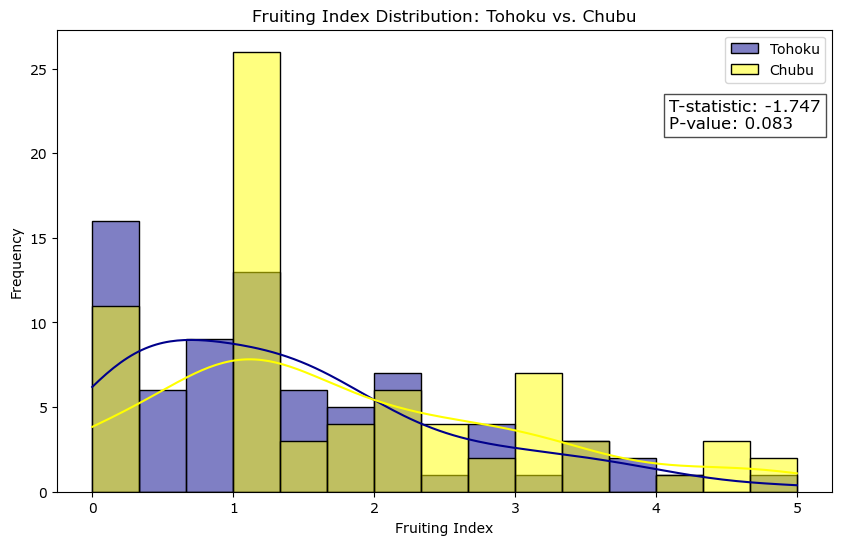

In [48]:
# Create histograms
plt.figure(figsize=(10, 6))
sns.histplot(tohoku_data, bins=15, color='darkblue', label='Tohoku', kde=True, alpha=0.5)
sns.histplot(chubu_data, bins=15, color='yellow', label='Chubu', kde=True, alpha=0.5)

# Add t-test results
plt.text(0.79, 0.85, f'T-statistic: {t_stat:.3f}\nP-value: {p_value:.3f}', 
         transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='white', alpha=0.7))

# Add title and labels
plt.title('Fruiting Index Distribution: Tohoku vs. Chubu')
plt.xlabel('Fruiting Index')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [27]:
from scipy import stats

# H0: There is no difference in means

tohoku_data = combined[combined['region_eng'] == 'Tohoku']['Fruiting_index']
chubu_data = combined[combined['region_eng'] == 'Chubu']['Fruiting_index']

#Perform an independent sample t-test
t_stat, p_value = stats.ttest_ind(tohoku_data, chubu_data, equal_var=False)

print(t_stat)
print(p_value)

-1.7470789438279197
0.08280782043459385


### Insights

Using a sample t-test, we compared the fruiting index between the two locations: Tohoku and Chubu Prefectures.

The null hypothesis is set as follows: "There is no difference in the mean fruiting index between Tohoku and Chubu Prefectures."

The T-statistic of -1.747 suggests that the mean fruiting index for Tohoku is lower than that for Chubu.

The p-value of 0.083 is greater than 0.05, meaning we do not have sufficient evidence to reject the null hypothesis. This indicates that while there is a difference in the mean fruiting indices between Tohoku and Chubu, this difference is not statistically significant at the 5% level.

Although not statistically significant at the 0.05 level, the p-value of 0.083 suggests a trend toward significance, indicating that Tohoku has a lower average fruiting index in this comparison.